to gather fd_stats from qc reports

In [2]:
import json
import csv 
import os
from glob import glob
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

In [3]:
fd_dict = defaultdict(dict, {})

In [4]:
qc_reports = list(glob('*/func/*_bold.json'))

In [5]:
for file in qc_reports:
    file_name = os.path.basename(file)
    f2 = file_name.split('_')
    sub_num = f2[0]
    task = f2[1].split('-')[1]
    with open(file) as f:
        temp_data = json.load(f)
        temp_mean = temp_data.get('fd_mean')
        temp_num = temp_data.get('fd_num')
        temp_perc = temp_data.get('fd_perc')
        #print(sub_num)
        fd_dict[sub_num][task] = {'fd_mean': temp_mean, 'fd_num': temp_num, 'fd_perc': temp_perc}     

In [6]:
fd_stats = pd.DataFrame.from_dict({(i,j): fd_dict[i][j] 
                           for i in fd_dict.keys()
                           for j in fd_dict[i].keys()},
                       orient='index' )

pd.MultiIndex.from_frame(fd_stats)

print(fd_stats)


# solution: https://stackoverflow.com/questions/13575090/construct-pandas-dataframe-from-items-in-nested-dictionary/13581730

                              fd_mean  fd_num    fd_perc
sub-2839 motorSelectiveStop  0.098694       2   0.203252
         discountFix         0.113609      49   4.979675
         manipulationTask    0.100561      11   0.787966
         rest                0.105558       8   0.808898
         stopSignal          0.103249       6   1.147228
...                               ...     ...        ...
sub-857  motorSelectiveStop  0.128961      88   8.943089
         stopSignal          0.209616      79  15.076336
         rest                0.126563      63   6.370071
         discountFix         0.276352     236  23.983740
         manipulationTask    0.360354     613  41.307278

[497 rows x 3 columns]


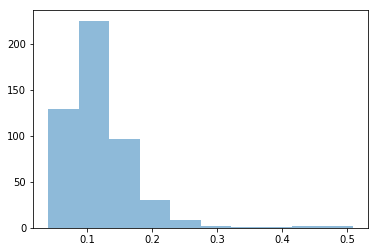

In [7]:
plt.hist(fd_stats['fd_mean'].values, alpha=0.5)
plt.show()

In [8]:
#change for different thresholds 

fd_thresh_mean = .2 
fd_thresh_perc = 30


fd_prob = fd_stats[np.logical_or(fd_stats.fd_mean > fd_thresh_mean, fd_stats.fd_perc > fd_thresh_perc)]
#print(fd_prob)

pd.set_option("display.max_rows", -1)
np.mean(fd_stats.fd_mean)

#for sub in sublist:
#    fd_stats['fd_mean'][sub]
    

0.12129824931215638

In [9]:
#write to tsv 

fd_stats.to_csv('output.tsv',sep='\t')